## Import required libraries

In this section we import the libraries like numpy and pandas, that are necessary to work with the data. We are also going to perform some exploratory data analysis using plots. So we have imported the python visualization libraries like matplotlib and seaborn.

In [1]:
# Data libraries
import pandas as pd
import numpy as np
import gzip
import json
import textwrap

from bs4 import BeautifulSoup
from html import unescape

# Set the max column width of the pandas dataframe to 100
pd.options.display.max_colwidth = 100

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_style("white")
sns.set_context("paper", font_scale=1.35)
%matplotlib inline

## Load the dataset

In this section, we will load the data into python pandas dataframe. 

We are using the Amazon Reviews Dataset for our project. The data set can be downloaded from the UCSD website (http://deepyeti.ucsd.edu/jianmo/amazon/index.html). This dataset contains product reviews and metadata from Amazon, including 233.1 million reviews spanning May 1996 – Oct 2018. The dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

Because of the vast size of the data, we will be working with a subset of it, including only <b>Luxury Beauty</b> category of products.

In [2]:
# Function to extract the json from zip file
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

In [3]:
# Function to read the json into a pandas dataframe
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [4]:
reviews_df_original = getDF('Luxury_Beauty.json.gz')
meta_df_original = getDF('meta_Luxury_Beauty.json.gz')

## Data pre-processing and cleaning

In [5]:
# Let us look at the head of reviews_df_original
reviews_df_original.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work. The hand cream ...",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, many different hand creams. I am one of those peop...",Best hand cream ever.,1262822400,NaN,NaN
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on my hands,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals overnight.,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [6]:
# Let us see how many rows and columns are there in the reviews_df_original dataframe
rows, columns = reviews_df_original.shape

print("Number of rows in the reviews_df_original dataframe : ", rows)
print("Number of columns in the reviews_df_original dataframe :", columns)

Number of rows in the reviews_df_original dataframe :  574628
Number of columns in the reviews_df_original dataframe : 12


In [7]:
# Now let us look at the head of meta_df_original dataframe
meta_df_original.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,"[After a long day of handling thorny situations, our new hand therapy pump is just the help you ...",,Crabtree &amp; Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZE, B07GFHJRMX, B074KGBGL7, B00R68QXJG, B00025WYZC,...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN2, B00KOBT82G, B00R68QXCS, B074KGBGL7, B075MH4Q9L,...","{' Product Dimensions: ': '2.2 x 2.2 x 7 inches ; 8.8 ounces', 'Shipping Weight:': '14....",Luxury Beauty,,,$30.00,B00004U9V2,"[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL.jpg, https://images-na.ssl-images-..."
1,[],,"[If you haven't experienced the pleasures of bathing in the Dead Sea, Bath Crystals are the next...",,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],"{' Product Dimensions: ': '3 x 3.5 x 6 inches ; 2.2 pounds', 'Shipping Weight:': '2.6 p...",Luxury Beauty,,,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the banks of the Dead Sea, is comprised of layer upon l...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],"{' Product Dimensions: ': '5.1 x 3 x 5.5 inches ; 2.48 pounds', 'Shipping Weight:': '2....",Luxury Beauty,,,,B0000532JH,"[https://images-na.ssl-images-amazon.com/images/I/41O1luEZuHL._SX50_SY65_CR,0,0,50,65_.jpg]",[https://images-na.ssl-images-amazon.com/images/I/41O1luEZuHL.jpg]
3,[],,[This liquid soap with convenient pump dispenser is formulated with conditioning extracts of sag...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10.1 fl. oz.",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXCS, B00KOBT82G, B071G8FG2N, B07FYFXBK8, B00TJ3NBN2,...","{' Product Dimensions: ': '2.6 x 2.6 x 6.7 inches ; 1.5 pounds', 'Shipping Weight:': '1...",Luxury Beauty,,,$15.99,B00005A77F,"[https://images-na.ssl-images-amazon.com/images/I/31BBeRbXZsL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/31BBeRbXZsL.jpg, https://images-na.ssl-images-..."
4,[],,"[Remember why you love your favorite blanket? The soft, comforting feeling of wrapping it around...",,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ2, B001JB55SQ, B000M3OR7C, B00J0A3ZCQ, B00SKBJ4L2,...",,,[],"42,464 in Beauty &amp; Personal Care (",[],"{' Product Dimensions: ': '7.2 x 2.2 x 7.2 inches ; 4 ounces', 'Shipping Weight:': '7.2...",Luxury Beauty,,,$18.00,B00005NDTD,"[https://images-na.ssl-images-amazon.com/images/I/31agMAVCHtL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/31agMAVCHtL.jpg, https://images-na.ssl-images-..."


In [8]:
# Let us see how many rows and columns are there in the meta_df_original dataframe
rows, columns = meta_df_original.shape

print("Number of rows in the meta_df_original dataframe : ", rows)
print("Number of columns in the meta_df_original dataframe :", columns)

Number of rows in the meta_df_original dataframe :  12299
Number of columns in the meta_df_original dataframe : 19


In [9]:
# Let us check the number of uniques users who have reviewed the products
reviews_df_original['reviewerID'].nunique()

416174

In [10]:
# Number of unique products
meta_df_original['asin'].nunique()

12111

In [11]:
# We have found 9 asin ids in reviews_df_original that are not present in the meta_df_original dataframe. 
# So we will drop all the rows in reviews_df_original that are corresponding to these 9 asin ids.
# This is necessary because we are later on going to do a inner merge on the itemId (asin) column

reviews_df_original[~reviews_df_original['asin'].isin(meta_df_original['asin'])]['asin'].nunique()

9

In [12]:
# Drop the 290 rows in reviews_df_original that are corresponding to the 9 asin ids that are not present in meta_df_original.

reviews_df_original.drop(reviews_df_original[~reviews_df_original['asin'].isin(meta_df_original['asin'])].index, inplace=True)

In [13]:
# Now the new shape of the reviews_df_original dataframe is as below

reviews_df_original.shape

(574338, 12)

In [14]:
# There are 188 duplicate products in the meta_df_original dataframe

meta_df_original['asin'].duplicated().sum()

188

In [15]:
# Remove the duplicate entries from the meta_df_original dataframe

meta_df_original.drop_duplicates(subset=['asin'], inplace=True)

In [16]:
# Now the new shape of the meta_df_original is as below

meta_df_original.shape

(12111, 19)

In [17]:
# Now let us merge the two dataframes reviews_df_original and meta_df_original into one dataframe 
# The merging will be done based on the column asin which is actually the unique itemid for each product 

df_merged = pd.merge(reviews_df_original, meta_df_original, how="inner", on ="asin")

In [18]:
# Let us check the shape of the df_merged

df_merged.shape

(574338, 30)

In [19]:
# Checking the top 5 rows from df_merged

df_merged.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work. The hand cream ...",dispensers don't work,1276560000,...,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN2, B00KOBT82G, B00R68QXCS, B074KGBGL7, B075MH4Q9L,...","{' Product Dimensions: ': '2.2 x 2.2 x 7 inches ; 8.8 ounces', 'Shipping Weight:': '14....",Luxury Beauty,,,$30.00,"[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL.jpg, https://images-na.ssl-images-..."
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, many different hand creams. I am one of those peop...",Best hand cream ever.,1262822400,...,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN2, B00KOBT82G, B00R68QXCS, B074KGBGL7, B075MH4Q9L,...","{' Product Dimensions: ': '2.2 x 2.2 x 7 inches ; 8.8 ounces', 'Shipping Weight:': '14....",Luxury Beauty,,,$30.00,"[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL.jpg, https://images-na.ssl-images-..."
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,...,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN2, B00KOBT82G, B00R68QXCS, B074KGBGL7, B075MH4Q9L,...","{' Product Dimensions: ': '2.2 x 2.2 x 7 inches ; 8.8 ounces', 'Shipping Weight:': '14....",Luxury Beauty,,,$30.00,"[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL.jpg, https://images-na.ssl-images-..."
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on my hands,Five Stars,1524009600,...,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN2, B00KOBT82G, B00R68QXCS, B074KGBGL7, B075MH4Q9L,...","{' Product Dimensions: ': '2.2 x 2.2 x 7 inches ; 8.8 ounces', 'Shipping Weight:': '14....",Luxury Beauty,,,$30.00,"[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL.jpg, https://images-na.ssl-images-..."
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals overnight.,I always have a backup ready.,1523923200,...,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN2, B00KOBT82G, B00R68QXCS, B074KGBGL7, B075MH4Q9L,...","{' Product Dimensions: ': '2.2 x 2.2 x 7 inches ; 8.8 ounces', 'Shipping Weight:': '14....",Luxury Beauty,,,$30.00,"[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL._SX50_SY65_CR,0,0,50,65_.jpg, http...","[https://images-na.ssl-images-amazon.com/images/I/41ClX6BRvZL.jpg, https://images-na.ssl-images-..."


In [20]:
# Let us check the brand column
## There are 573970 rows where the brand is not specified. It is better to drop the column

df_merged.brand[df_merged.brand.str.strip() == ''].shape

(573970,)

In [21]:
# Let us drop some unnecessary columns from the df_merged dataframe

df_merged.drop(columns=['vote', 'verified', 'reviewTime', 'style', 'image', 'summary',
                        'category', 'tech1', 'fit', 'also_buy', 'tech2', 'reviewText',
                       'feature', 'rank', 'also_view','details', 'main_cat', 'unixReviewTime',
                       'similar_item', 'date', 'imageURL', 'imageURLHighRes', 'brand'], 
               axis=1, inplace=True)

In [22]:
# Let us rename some columns for convenience

df_merged.rename(columns={'overall':'rating', 'reviewerID':'userId', 'asin':'itemId', 
                          'reviewerName':'userName'}, inplace=True)

In [23]:
# Lets do some formatting of the price column. Currently it is of object type. We will change it to float64

df_merged['price'] = df_merged['price'].str.replace('$','').str.replace(',','')
df_merged.drop(df_merged[df_merged['price'].str.strip() == ""].index, axis=0, inplace=True)
df_merged.drop(df_merged[df_merged['price'].str.len() > 10].index, axis=0, inplace=True)
df_merged['price']= df_merged['price'].astype(float)

In [24]:
# Remove html tags and special characters from title column

df_merged['title'] = [BeautifulSoup(X).get_text() for X in df_merged['title'] ]

In [25]:
# Finally, for each unique product, we will calculate the count of ratings and the average rating for that product

ratings = df_merged.groupby('itemId').agg(['count', 'mean'])['rating']
ratings.reset_index()

,itemId,count,mean
0,B00004U9V2,582,4.623711
1,B00005A77F,18,4.722222
2,B00005NDTD,80,4.862500
3,B00005V50B,558,4.177419
4,B00005V50C,26,4.346154
...,...,...,...
6849,B01HIQEOLO,11,5.000000
6850,B01HIQHQU0,14,4.500000
6851,B01HIQIEYC,25,4.360000
6852,B01HJ2UY0W,1,1.000000


In [26]:
# We merge the ratings dataframe to the df_merged dataframe 
# and rename the count and mean columns to rating_count and rating_avg respectively

df_merged_final = pd.merge(df_merged, ratings, how='inner', on='itemId')
df_merged_final.rename(columns={'count':'rating_count', 'mean':'rating_avg'}, inplace=True)

In [27]:
# Let us have a look at the final merged dataframe

df_merged_final.head()

,rating,userId,itemId,userName,description,title,price,rating_count,rating_avg
0,2.0,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"[After a long day of handling thorny situations, our new hand therapy pump is just the help you ...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
1,5.0,A3HO2SQDCZIE9S,B00004U9V2,chandra,"[After a long day of handling thorny situations, our new hand therapy pump is just the help you ...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
2,5.0,A2EM03F99X3RJZ,B00004U9V2,Maureen G,"[After a long day of handling thorny situations, our new hand therapy pump is just the help you ...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
3,5.0,A3Z74TDRGD0HU,B00004U9V2,Terry K,"[After a long day of handling thorny situations, our new hand therapy pump is just the help you ...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711
4,5.0,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,"[After a long day of handling thorny situations, our new hand therapy pump is just the help you ...",Crabtree & Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ,30.0,582,4.623711


In [28]:
rows, columns = df_merged_final.shape
print("Number of rows in the final dataframe : ", rows)
print("Number of columns in the final dataframe :", columns)
print('Number of unique users in the final dataframe = ', df_merged_final['userId'].nunique())
print('Number of unique products in the final dataframe = ', df_merged_final['itemId'].nunique())

Number of rows in the final dataframe :  459985
Number of columns in the final dataframe : 9
Number of unique users in the final dataframe =  342713
Number of unique products in the final dataframe =  6854


## Exploratory data analysis

In this section, we will try to gain some insights from the dataset, by answering some questions related to the data. We will
also plot some graphs and charts with the help of python data visualization libraries like matplotlib and seaborn.

[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Count of Ratings')]

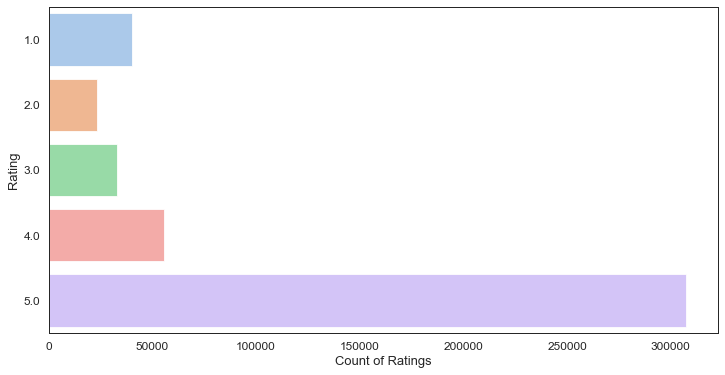

In [29]:
# Distribution of ratings

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y="rating", data=df_merged_final).set(xlabel='Count of Ratings', ylabel='Rating')

In [30]:
# Most reviewed item title

top_10_items = df_merged_final.groupby(['itemId', 'title']).agg(['count'])['rating'].sort_values(by=['count'], ascending=False).head(10)
top_10_items.reset_index(inplace=True)
top_10_items

,itemId,title,count
0,B0013U0EYI,TOPPIK Hair Building Fibers,6954
1,B00172O9NO,"Mario Badescu Facial Spray with Aloe, Herbs and Rosewater, 8 oz.",6138
2,B00176GSEI,HOT TOOLS Professional 24k Gold Extra-Long Barrel Curling Iron/Wand for Long Lasting Results,5262
3,B0017SWIU4,"Mario Badescu Drying Lotion, 1 fl. oz.",4300
4,B0002ZW5UQ,TOPPIK Hair Building Fibers,3460
5,B000IIA5UO,HOT TOOLS Professional 24k Gold Extra-Long Barrel Curling Iron/Wand for Long Lasting Results,3198
6,B000NG80GM,"OPI Nail Lacquer, Cajun Shrimp, 0.5 fl. oz.",3075
7,B000142FVW,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0.5 Fl Oz",3056
8,B002K6AHQY,"CND Vinylux Weekly Nail Polish, Rock Royalty, .5 oz",2810
9,B000ASDGK8,BaBylissPRO Ceramix Xtreme Dryer,2734


[Text(0, 0, 'TOPPIK Hair Building Fibers'),
 Text(0, 0, 'Mario Badescu Facial Spray with Aloe, Herbs and\nRosewater, 8 oz.'),
 Text(0, 0, 'HOT TOOLS Professional 24k Gold Extra-Long Barrel\nCurling Iron/Wand for Long Lasting Results'),
 Text(0, 0, 'Mario Badescu Drying Lotion, 1 fl. oz.'),
 Text(0, 0, 'OPI Nail Lacquer, Cajun Shrimp, 0.5 fl. oz.'),
 Text(0, 0, 'OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0.5\nFl Oz'),
 Text(0, 0, 'CND Vinylux Weekly Nail Polish, Rock Royalty, .5\noz'),
 Text(0, 0, 'BaBylissPRO Ceramix Xtreme Dryer')]

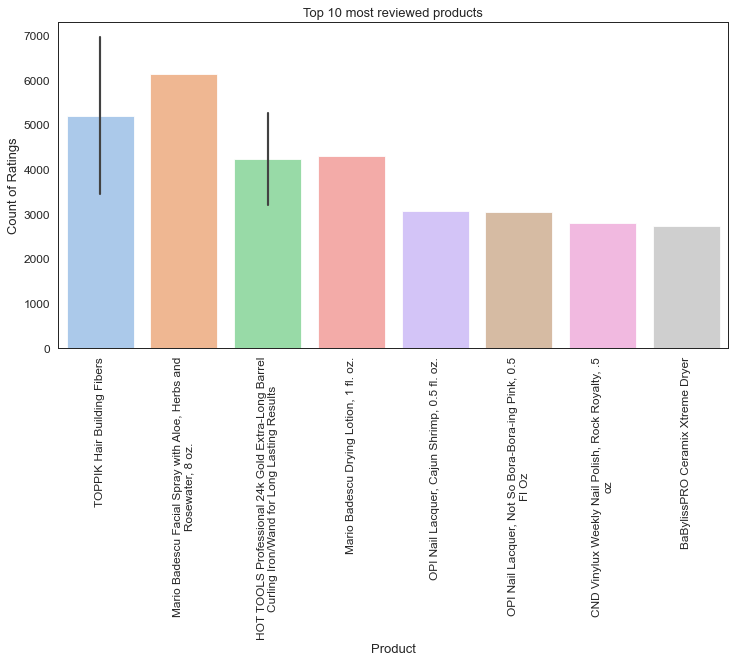

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Top 10 most reviewed products')
ax.tick_params(axis='x', rotation=90)
sns.barplot(x='title', y='count', data=top_10_items).set(xlabel='Product', ylabel='Count of Ratings')
ax.set_xticklabels(textwrap.fill(x.get_text(), 50) for x in ax.get_xticklabels())

In [32]:
# Top 10 users based on number of ratings given

top_10_users = df_merged_final.groupby(['userId', 'userName']).agg(['count'])['rating'].sort_values(by=['count'], ascending=False).head(10)
top_10_users.reset_index(inplace=True)
top_10_users

,userId,userName,count
0,AJL6HX8O2QLVO,Patrick Tracy,128
1,A1O4PNHACFEDEM,pmburk,125
2,A18VCM7Y7HK6EW,Chris,124
3,AJC7TSNP5UAWN,Mike,124
4,A2NT1LGR2BYP0I,LeeC,124
5,A11Z3ANM4PQFMH,xaggie,124
6,A3NMQEQPT5LDIA,PacNW,123
7,A2V1MAUHH1YHKK,Mdoza,123
8,A3NQA378KXTZQM,JMinton,123
9,A2H6LHCM3AR3YV,Twitch,123


[Text(0, 0.5, 'Count of Ratings given'), Text(0.5, 0, 'User Name')]

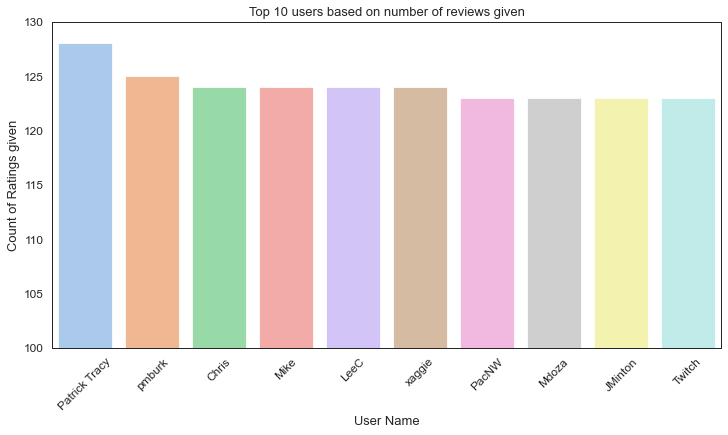

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Top 10 users based on number of reviews given')
ax.tick_params(axis='x', rotation=45)
ax.set(ylim=(100,130))
sns.barplot(x='userName', y='count', data=top_10_users).set(xlabel='User Name', ylabel='Count of Ratings given')

In [34]:
# Lets take a look at the price range

df_merged_final['price'].describe()

count    459985.000000
mean         40.570409
std          42.137622
min           1.000000
25%          17.500000
50%          28.000000
75%          46.950000
max        6500.000000
Name: price, dtype: float64

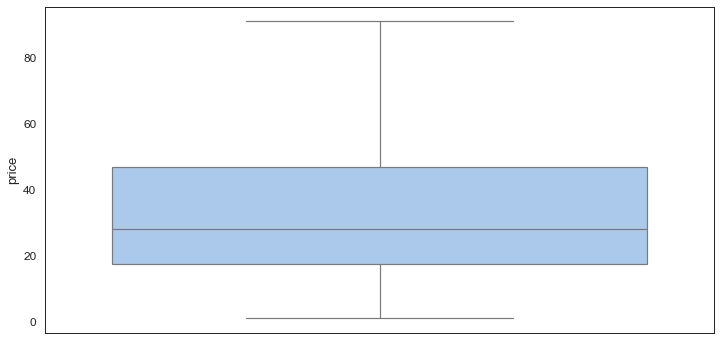

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.boxplot(df_merged_final.price, showfliers=False)
sns.boxplot(y='price', data=df_merged_final, showfliers=False)

In [36]:
df_merged_final.to_csv('luxury_beauty_cleaned.csv', index = False)